In [3]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.special import ellipe
from scipy.special import ellipk

#parameters for Galaxy NGC 5907
G = 4.300e-6                                        #gravitational constant (kpc/solar mass*(km/s)^2)
h = 5.7                                             #radial scale-length (kpc)
z0 = 0.83                                           #half-thickness (kpc)
R = 19.3                                            #cut-off radius (kpc)
d = 0.99                                            #cut-off length upper limits(kpc)

rho = 10                                            #madeup parameter until we figure out the partial derivative of rho(u,xi)
mu0 = 1e9                                           #madeup parameter: central surface density

#definitions
x = lambda r,u,xi: ((r**2)+(u**2)+(xi**2))/(2*r*u)
p = lambda x: x-(np.sqrt((x**2)-1))
r = np.linspace(0, 25, 500)
rho00 = mu0/(2*z0)

print(p(x(1,1,0)))
print(R+d)

1.0
20.29


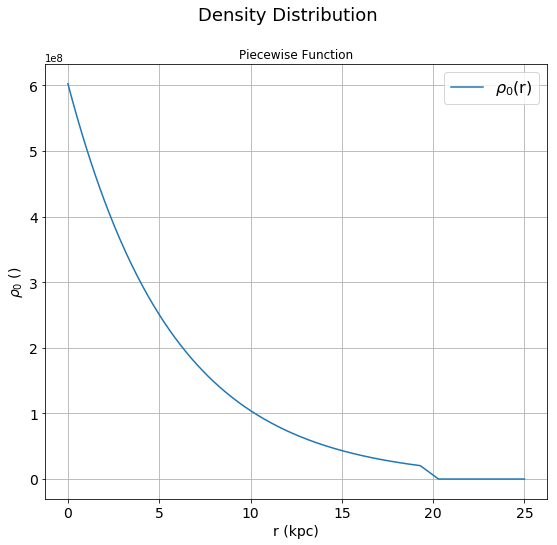

104224967


In [6]:
#density piecewise function
#def rho0(r, R, h, d):
def rho0(r):
    condlist = [r <= R, (r > R) & (r <= (R+d)), r > (R+d)]
    funclist = [lambda r: rho00*np.exp(-r/h), lambda r: rho00*np.exp(-R/h)*(1-((r-R)/d)), lambda r: 0]
    return np.piecewise(r, condlist, funclist)


#plotting piecewise function
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(r, rho0(r), linestyle='solid', label='$\\rho_0$(r)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('$\\rho_0$ ()', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.show()

print(rho0(10))

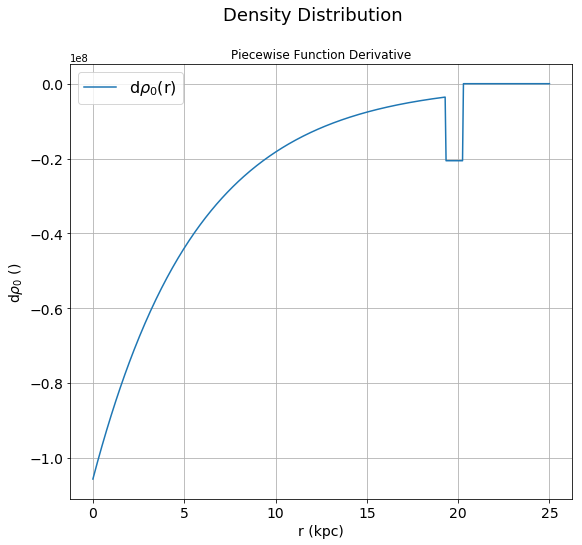

In [7]:
#partial derivative of rho(u,xi)
def durho0(r):
    condlist = [r <= R, (r > R) & (r <= (R+d)), r > (R+d)]
    funclist = [lambda r: -(1/h)*rho00*np.exp(-r/h), lambda r: -(1/d)*rho00*np.exp(-R/h), lambda r: 0]
    return np.piecewise(r, condlist, funclist)

#plotting piecewise function derivative
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(r, durho0(r), linestyle='solid', label='d$\\rho_0$(r)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function Derivative')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('d$\\rho_0$ ()', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.show()

(500,)
(500,)


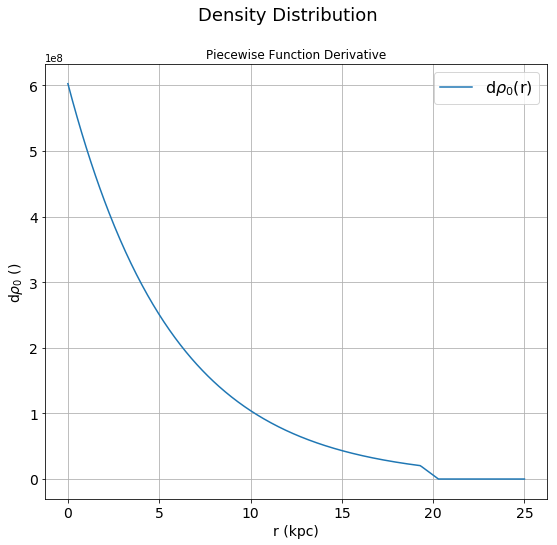

602409638.0


In [13]:
#disk density distribution
rho_rz = lambda r,z: rho0(r)*(np.power(np.cosh(z/z0), (-2)))
drho_rz = lambda r,z: durho0(r)*(np.power(np.cosh(z/z0), (-2)))

z = np.linspace(0, 25, 500)
#z = 0
#print(np.shape(r))
#print(np.shape(z))
#print(np.shape(rho_rz(r,z)))

#plotting disk density distribution
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(r, rho_rz(r,0), linestyle='solid', label='d$\\rho_0$(r)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function Derivative')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('d$\\rho_0$ ()', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.show()

print(rho_rz(0,0))

In [15]:
#complete elliptic integral
K = lambda r,u,xi: ellipk(p(x(r,u,xi))) - ellipe(p(x(r,u,xi)))

print(K(1,1,1))

0.35734399698214614


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


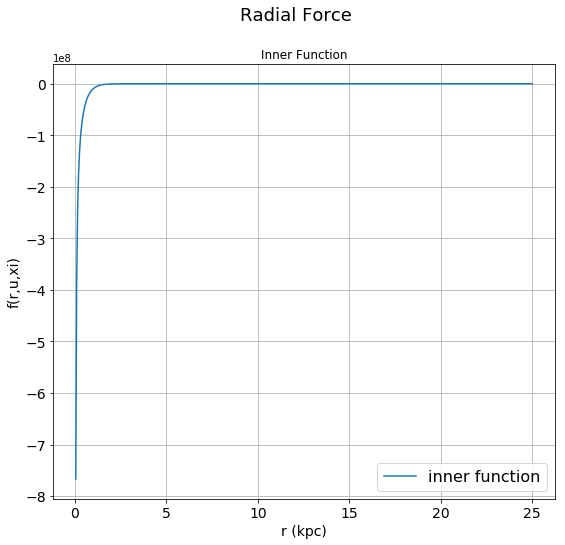

-9876768.64718937


In [16]:
#inner function
#f = lambda r,u,xi: ((2*np.sqrt(u))/(np.pi*np.sqrt(r*p(x(r,u,xi)))))*K(r,u,xi)*drho_rz(u,xi)
#f = lambda r,u,xi: ((2*np.sqrt(u))/(np.pi*np.sqrt(r*p(x(r,u,xi)))))*K(r,u,xi)*drho_rz(r,z)
f = lambda r2,u2,z2: drho_rz(r2,z2)*(2*K(r2,u2,z2))/(np.pi*np.sqrt(r2*u2*p(x(r2,u2,z2))))

#plot inner function
u = np.linspace(0, 25, 500)
xi = np.linspace(0, 25, 500)
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(r, f(r,u,z), linestyle='solid', label='inner function')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Radial Force', fontsize=18)
ax.set(title='Inner Function')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('f(r,u,xi)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.show()

print(f(1,1,1))

In [17]:
#integrate function
#intf = lambda xi: quad(f, 0, np.inf, args=(r,u,))
intf = lambda z: quad(f, 0, np.inf, args=(r,u,))

In [18]:
#integrate outer function
intintf = lambda u: quad(intf, 0, np.inf, args=(r,))
#u = r

In [19]:
#radial force function
F = lambda r: 4*np.pi*G*intintf(u)

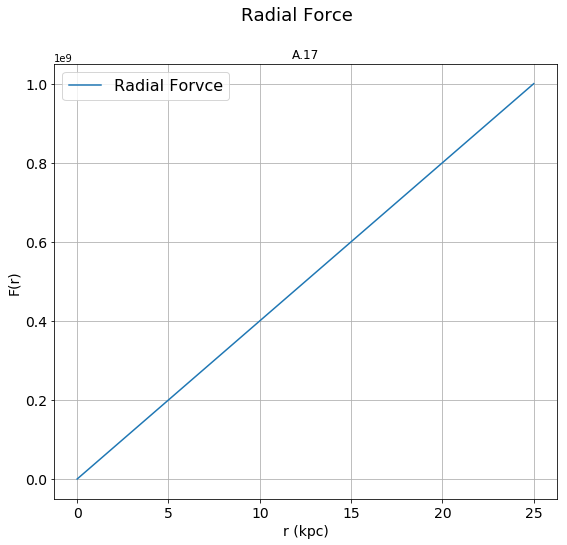

In [20]:
#plot radial force
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

#vF = np.vectorize(F)
F = np.linspace(0, 1e9, 500)

plt.plot(r, F, linestyle='solid', label='Radial Forvce')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Radial Force', fontsize=18)
ax.set(title='A.17')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('F(r)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.show()
